This notebook gives posterior plots and the evaluation metrics

In [47]:
# import packages

import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sbi import analysis, utils

# custom packages
import models
import helper_functions as hp



In [29]:
# define variables for correct labelling

data, L = hp.get_base()
n_chains = 4
n_models = 4
model_names = ["model_a","model_b","model_c","model_d"]
parameter_names =[rf"$\lambda_{{1,2}}$",rf"$\lambda_{{2,1}}$",rf"$\lambda_{{2,3}}$",rf"$\lambda_{{3,2}}$",rf"$\lambda_{{3,4}}$",
                    rf"$\lambda_{{4,3}}$",rf"$\lambda_{{4,5}}$",rf"$\lambda_{{5,4}}$",rf"$\alpha_{1}$",
                    rf"$\alpha_{2}$",rf"$\alpha_{3}$",rf"$\alpha_{4}$",rf"$\alpha_{5}$"
                     ]

# posterior

In [3]:
# extract evaluation metrics

def posterior_metrics(model):

    D, x_dim, simulate = models.get_model(model)

    # load burn-in
    with open(rf'store_results/gw_post_samples_{model}.pkl', 'rb') as f:
        gw_post_samples = pickle.load(f)

    # load effective sample size
    with open(rf'store_results/ess_post_samples_{model}.pkl', 'rb') as f:
        ess_post_samples = pickle.load(f)

    print(rf"The Geweke burn-ins are:")
    print(gw_post_samples)

    print(rf"The effective sample sizes are:")
    print(ess_post_samples)

In [40]:
def posterior_plots(model, index):

    D, x_dim, simulate = models.get_model(model)

    # load posterior samples
    with open(rf'store_results/post_samples_{model}.pkl', 'rb') as f:
        post_samples = pickle.load(f)

    # load burn-in
    with open(rf'store_results/gw_post_samples_{model}.pkl', 'rb') as f:
        gw_post_samples = pickle.load(f)

    # get maximum burn-in of all reliable chains
    max_gw = 0
    for i in range(n_chains):
        if index[i] and int(gw_post_samples[i]) > max_gw:
            max_gw = int(gw_post_samples[i])

    if D == 9:
        parameter_names[8] = rf"$\alpha$"
    else:
        parameter_names[8] = rf"$\alpha_{1}$"

    # plot each parameter 
    for i in range(D):
        for j in range(n_chains):
            
            if index[j]:
                if i <= 7:
                    sns.kdeplot(np.exp(post_samples[j,max_gw:,i]), label = rf"Chain {j+1}", clip = [0.0009,20.0855])
                else:
                    sns.kdeplot(post_samples[j,max_gw:,i], label = rf"Chain {j+1}", clip = [-2,2])

        plt.xlabel(parameter_names[i])
        plt.title("Parameter " + parameter_names[i])
        plt.legend(loc = "upper right")
        plt.show()

Get the chains

In [5]:
posterior_metrics("model_a")

The Geweke burn-ins are:
[15000. 10000. 10000. 70000.]
The effective sample sizes are:
[2441.70611479  708.94107907 2555.34306322   62.94809393]


In [6]:
# select chains
index_a = [1,0,1,0]

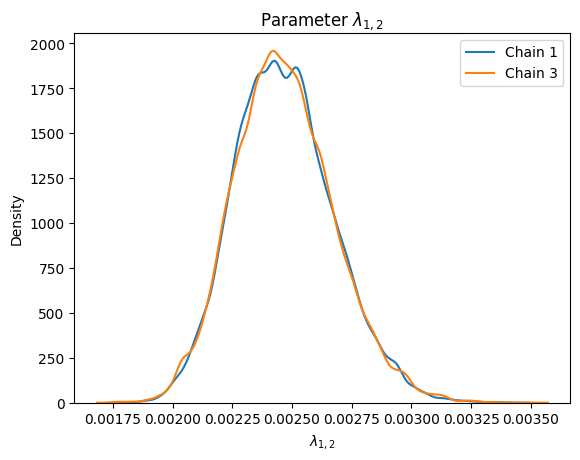

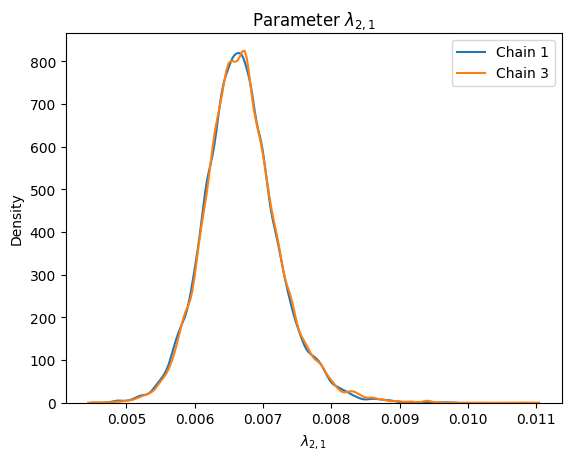

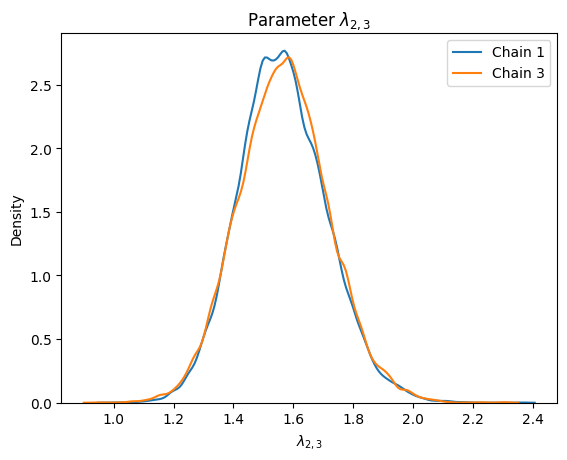

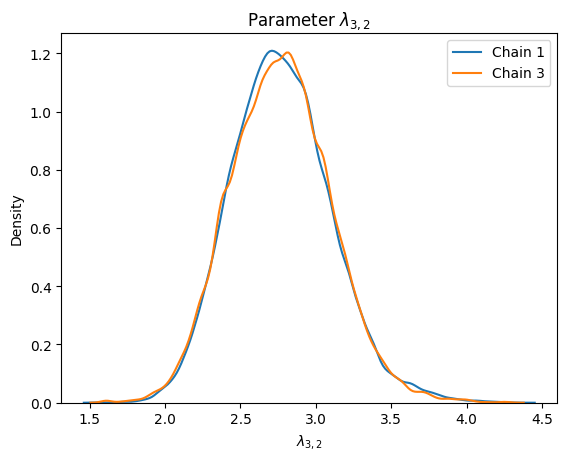

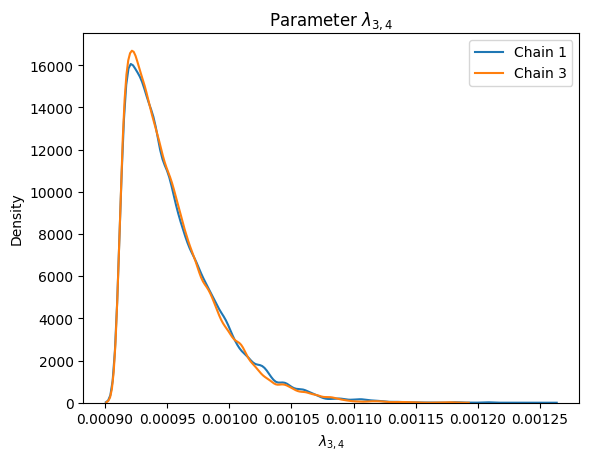

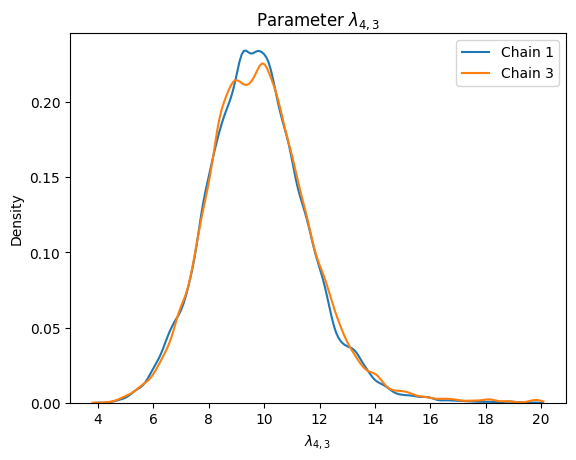

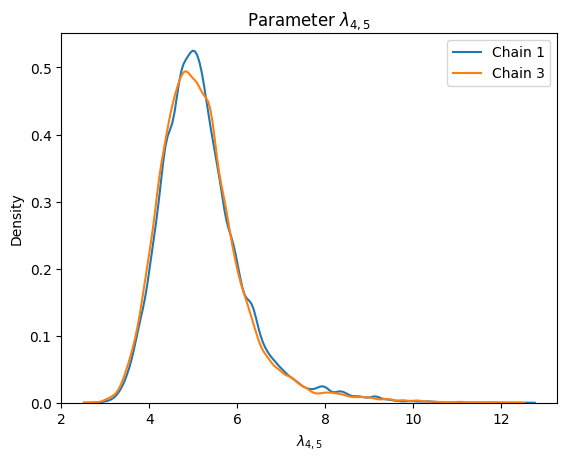

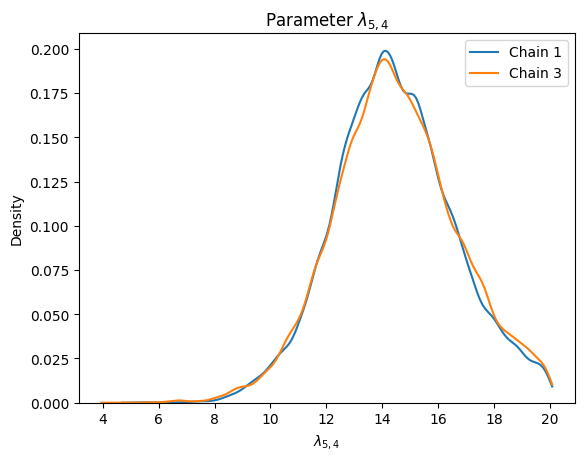

In [37]:
posterior_plots("model_a", index_a)

In [10]:
posterior_metrics("model_b")

The Geweke burn-ins are:
[ 5000.  5000. 15000.  5000.]
The effective sample sizes are:
[2363.98272347 2237.88642585 1799.4393214   843.57822759]


In [11]:
index_b = [1,1,1,0]

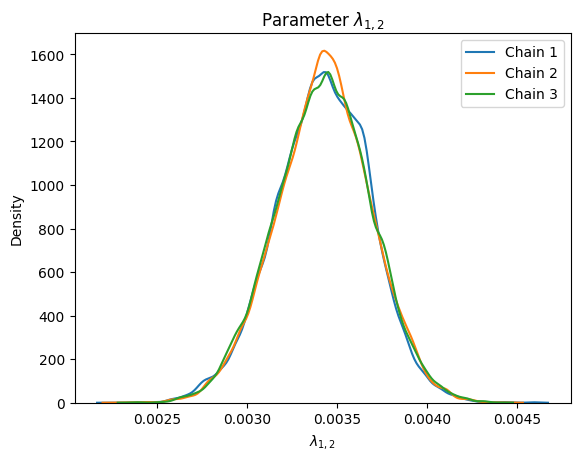

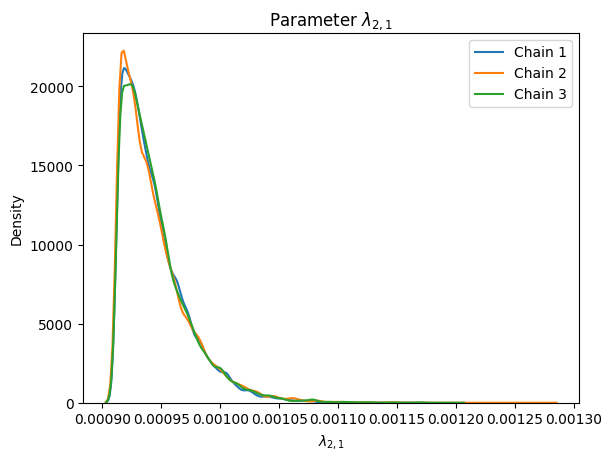

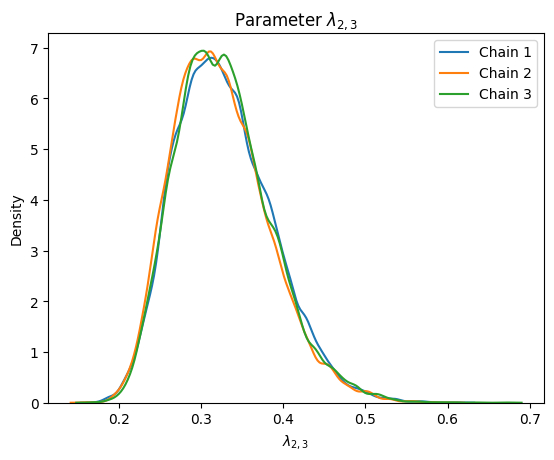

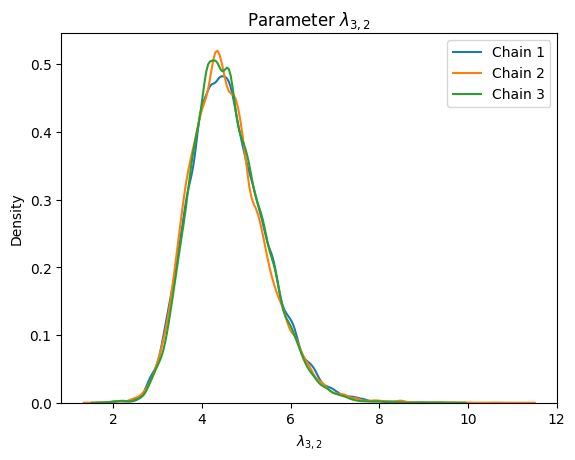

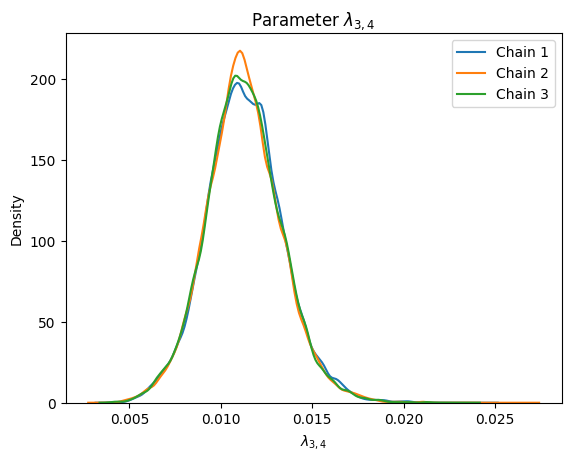

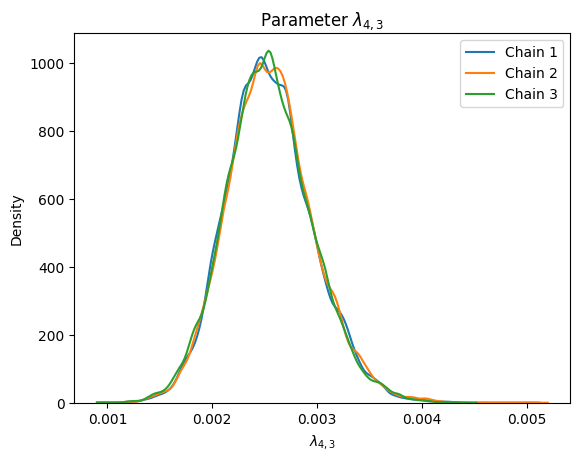

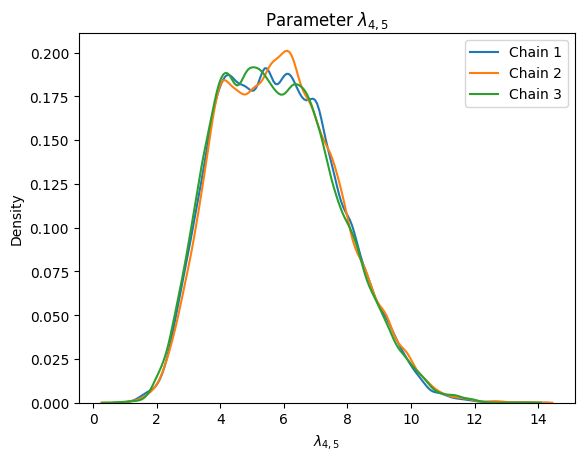

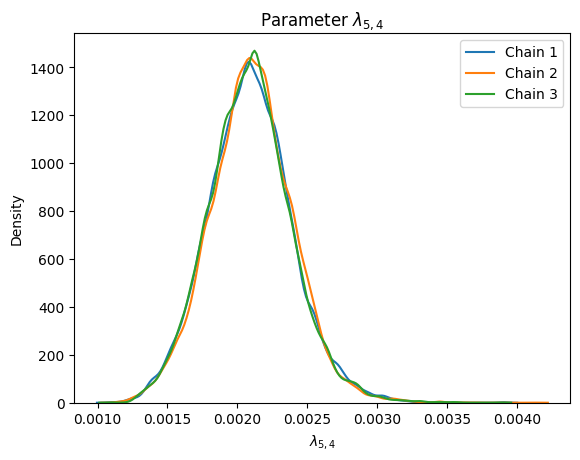

In [38]:
posterior_plots("model_b", index_b)

In [14]:
posterior_metrics("model_c")

The Geweke burn-ins are:
[15000. 10000. 10000.  5000.]
The effective sample sizes are:
[1624.24903014 1545.52218816 1160.45566736 1387.1392932 ]


In [15]:
index_c = [1,1,1,1]

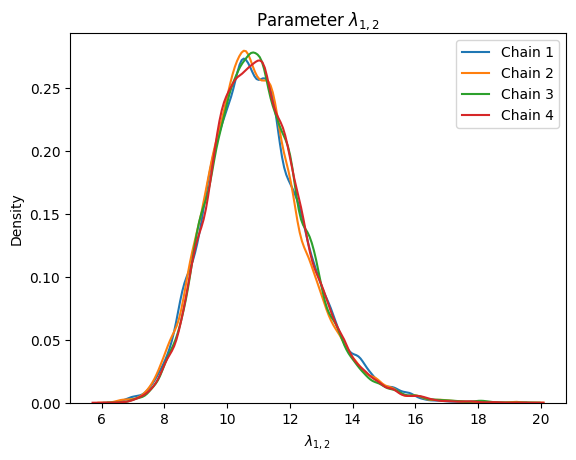

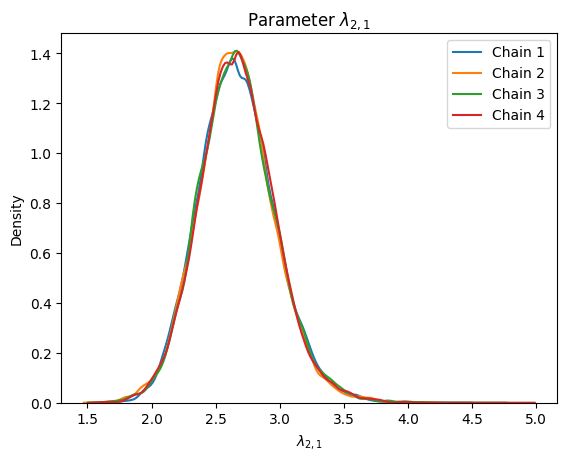

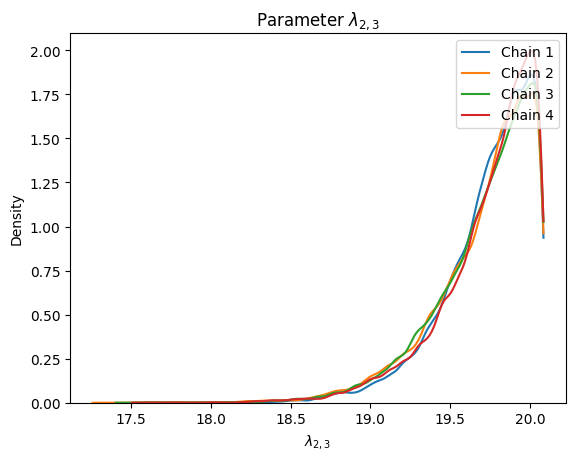

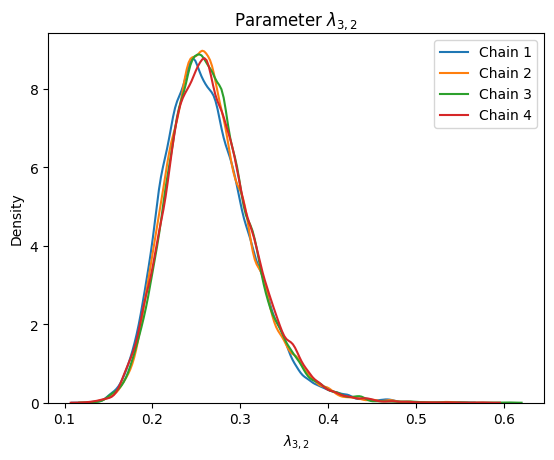

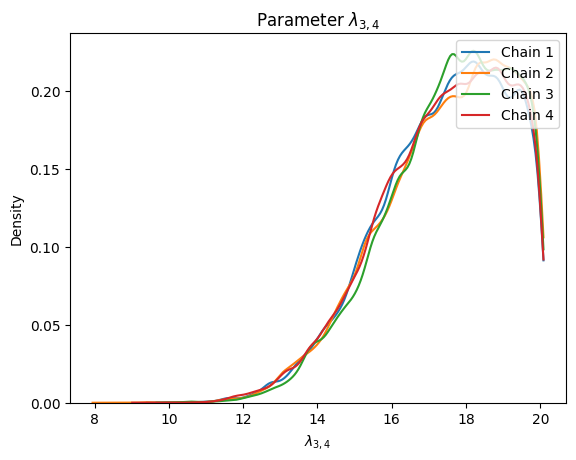

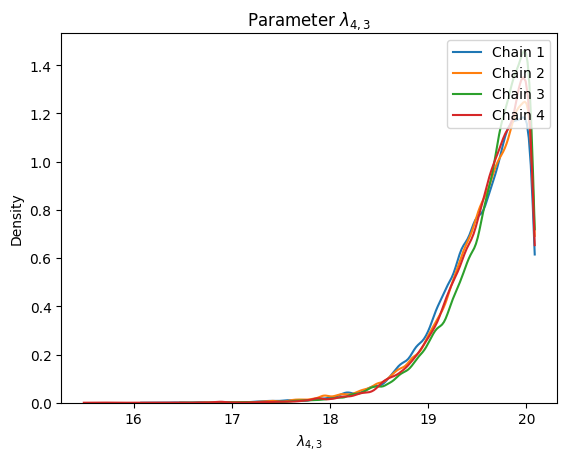

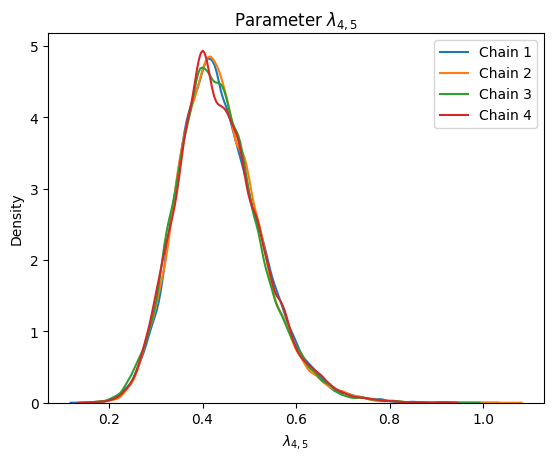

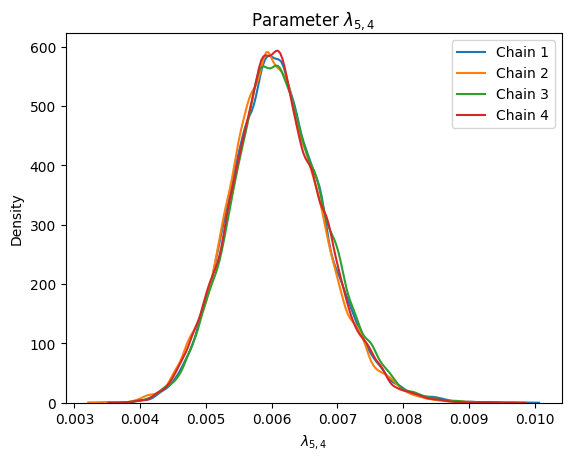

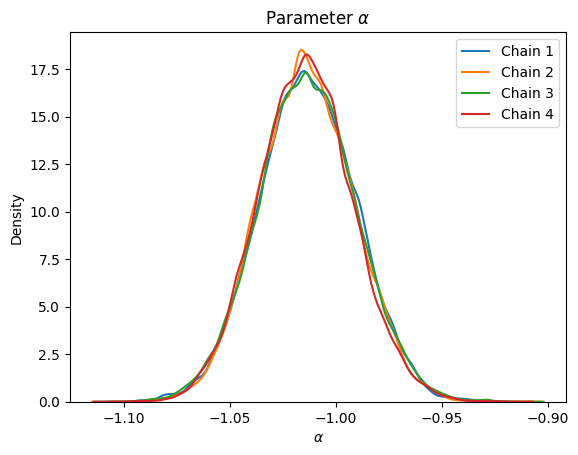

In [41]:
posterior_plots("model_c", index_c)

In [42]:
posterior_metrics("model_d")

The Geweke burn-ins are:
[100001.  45000.  55000.  35000.]
The effective sample sizes are:
[         nan 388.35238288  12.05531625  27.00155286]


In [43]:
index_d = [0,1,0,0]

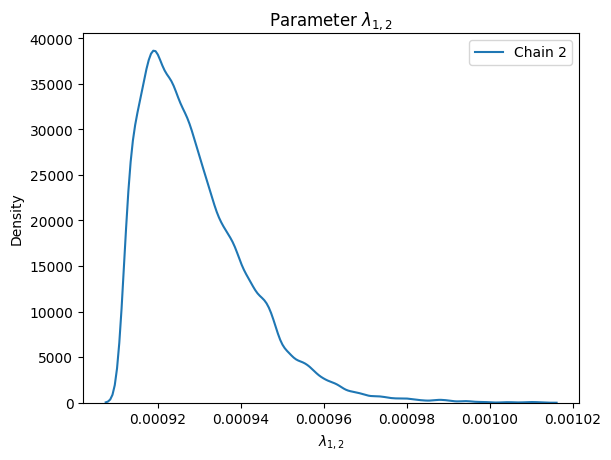

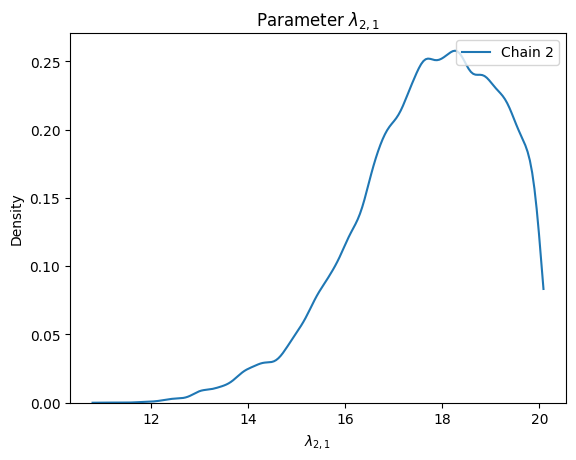

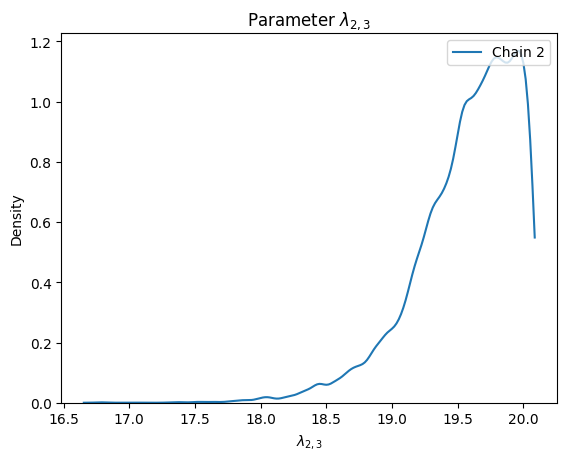

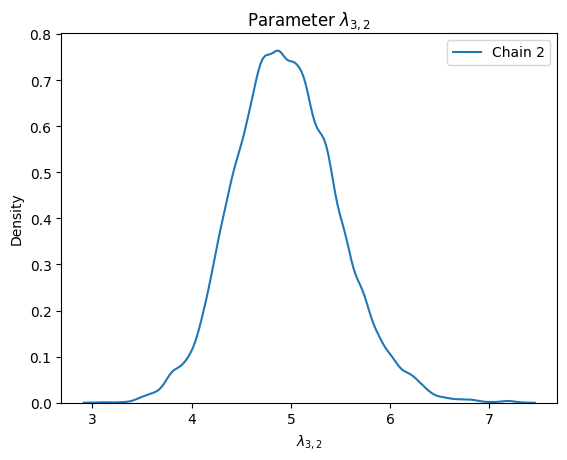

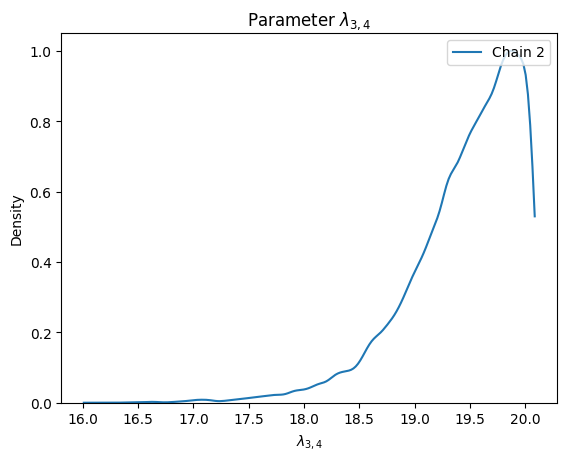

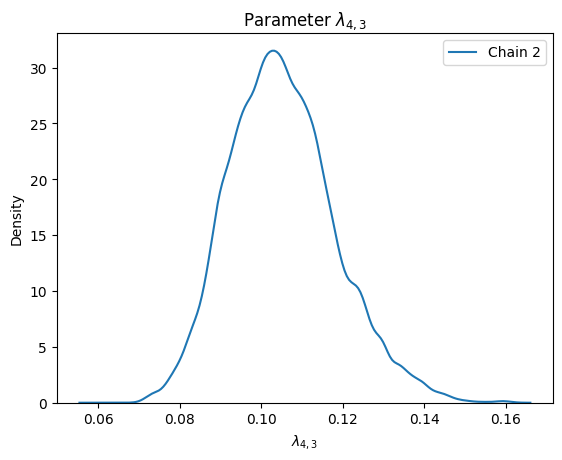

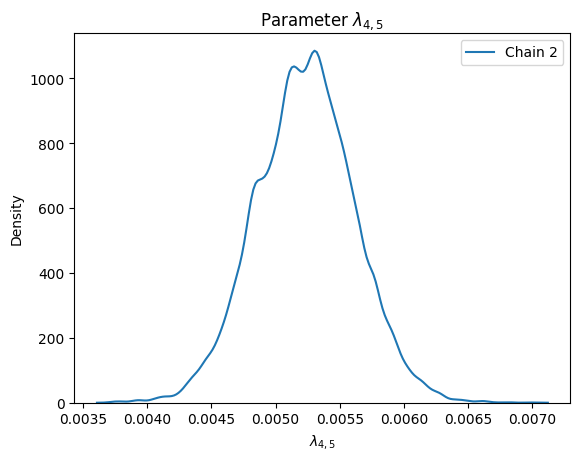

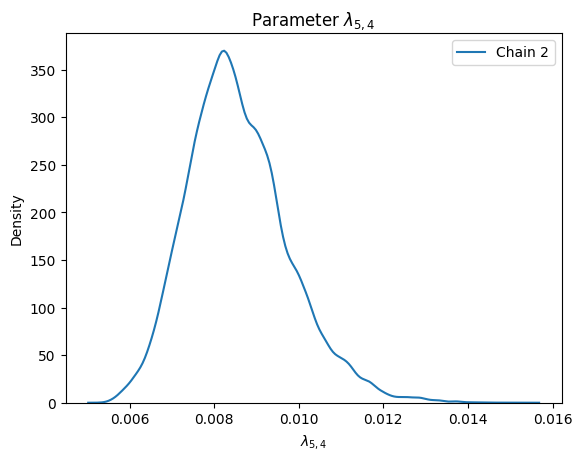

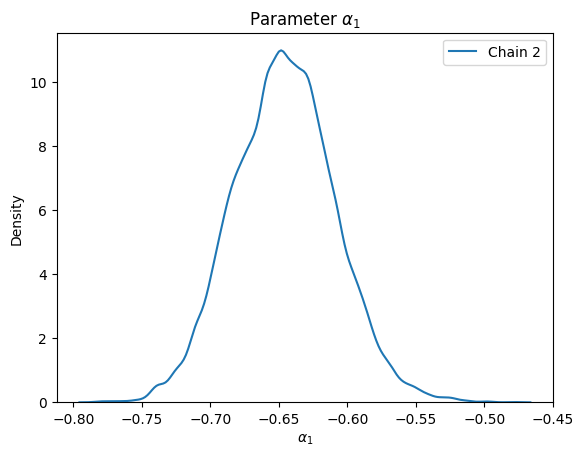

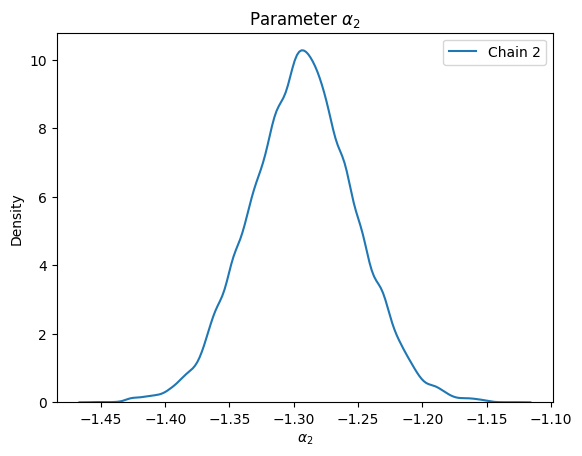

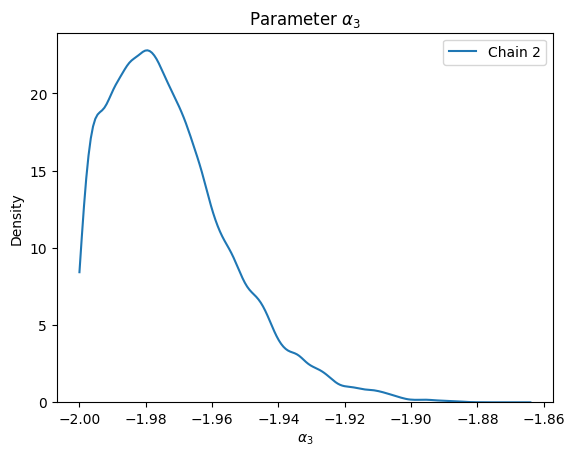

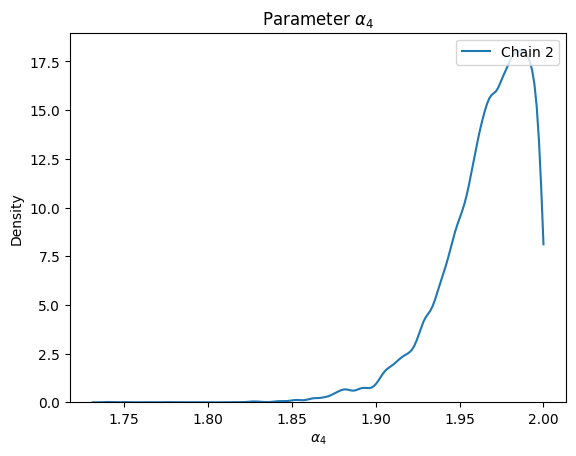

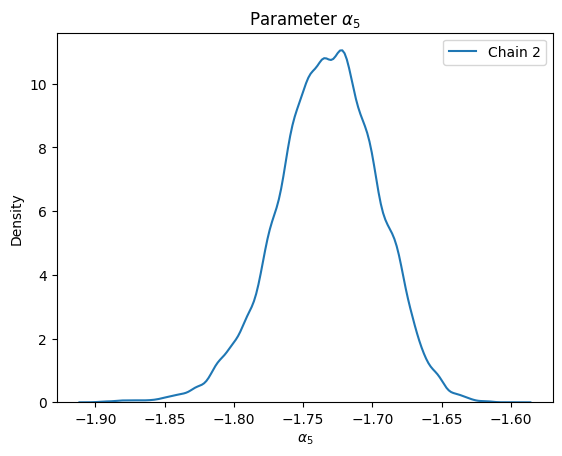

In [44]:
posterior_plots("model_d", index_d)

# SBC

In [45]:
def sbc_plot(model):

    D, x_dim, simulate = models.get_model(model)

    num_posterior_samples = 300

    with open(rf'store_results/ranks_{model}.pkl', 'rb') as f:
        ranks = pickle.load(f)

    with open(rf'store_results/thetas_{model}.pkl', 'rb') as f:
        thetas = pickle.load(f)

    with open(rf'store_results/dap_samples_{model}.pkl', 'rb') as f:
        dap_samples = pickle.load(f)

    # with open(rf'store_results/xs_{model}.pkl', 'rb') as f:
    #     xs = pickle.load(f)

    
    check_stats = analysis.check_sbc(
    ranks, thetas, dap_samples, num_posterior_samples=num_posterior_samples
    )  

    print(
        f"kolmogorov-smirnov p-values \ncheck_stats['ks_pvals'] = {check_stats['ks_pvals'].numpy()}"
    )

    # print(
    #     f"c2st accuracies \ncheck_stats['c2st_ranks'] = {check_stats['c2st_ranks'].numpy()}"
    # )

    # print(f"- c2st accuracies check_stats['c2st_dap'] = {check_stats['c2st_dap'].numpy()}")

    # accurate title
    if model == "model_a":
        title = "Model A"
    elif model == "model_b":
        title = "Model B"
    elif model == "model_c":
        title = "Model C"
    elif model == "model_d":
        title = "Model D"


    keys = parameter_names
    if D == 9:
        keys[8] = rf"$\alpha$"
    else:
        keys[8] = rf"$\alpha_1$"
        


    

    f, ax = analysis.sbc_rank_plot(ranks, 1_000, plot_type="cdf", num_bins = 100)
    ax.legend(keys[:D])
    ax.set_title(title)
    ax.set_ylabel("ECDF")
    ax.set_xlabel("data-averaged posterior rank")
    ax.set_yticks([0.,0.25,0.5,0.75,1.])
    plt.show()

c:\Users\klass\AppData\Local\Programs\Python\Python312\Lib\site-packages\sbi\analysis\sbc.py:363: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  if (c2st_scores.std(0) > 0.05).any():


kolmogorov-smirnov p-values 
check_stats['ks_pvals'] = [0. 0. 0. 0. 0. 0. 0. 0.]


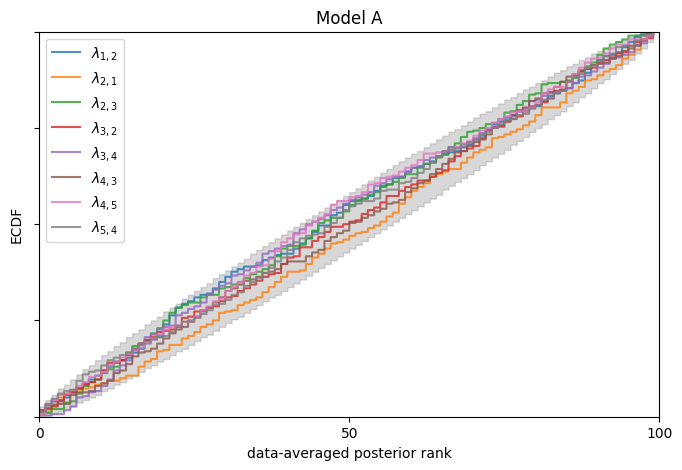

In [48]:
sbc_plot("model_a")

c:\Users\klass\AppData\Local\Programs\Python\Python312\Lib\site-packages\sbi\analysis\sbc.py:363: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  if (c2st_scores.std(0) > 0.05).any():


kolmogorov-smirnov p-values 
check_stats['ks_pvals'] = [0. 0. 0. 0. 0. 0. 0. 0.]


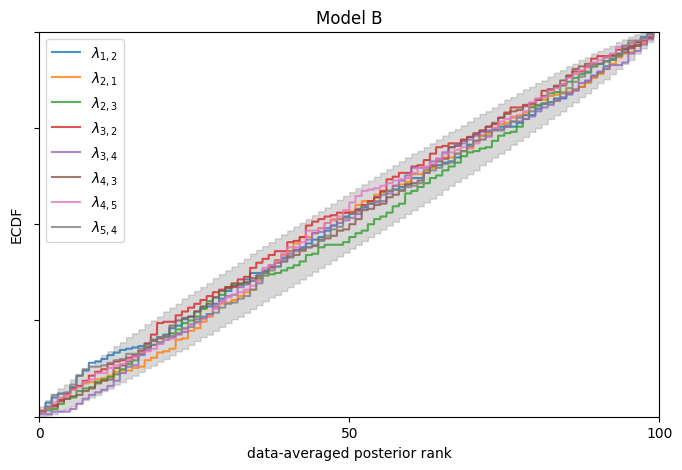

In [49]:
sbc_plot("model_b")

c:\Users\klass\AppData\Local\Programs\Python\Python312\Lib\site-packages\sbi\analysis\sbc.py:363: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  if (c2st_scores.std(0) > 0.05).any():


kolmogorov-smirnov p-values 
check_stats['ks_pvals'] = [0. 0. 0. 0. 0. 0. 0. 0. 0.]


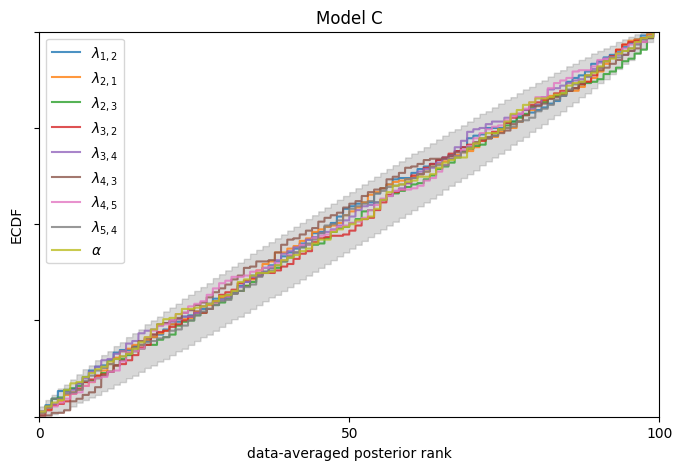

In [50]:
sbc_plot("model_c")

c:\Users\klass\AppData\Local\Programs\Python\Python312\Lib\site-packages\sbi\analysis\sbc.py:363: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  if (c2st_scores.std(0) > 0.05).any():


kolmogorov-smirnov p-values 
check_stats['ks_pvals'] = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


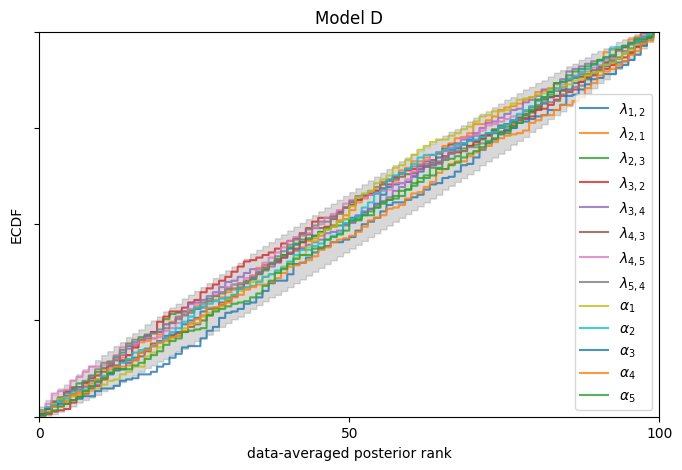

In [51]:
sbc_plot("model_d")

# Bayesfactor

In [52]:
# try corrected version
def mod_likelihood(model, n_draws, prior_sample):

    # get model-specific hyper-parameters
    D, x_dim, simulate = models.get_model(model)

    # bring true data in correct shape
    if x_dim == 3:
        x_obs = [torch.zeros(L,x_dim)]
        for i in range(L):
            x_obs[0][i] = torch.tensor([data["initial_state"].iloc[i],
                                    data["final_state"].iloc[i],
                                    data["observation_time"].iloc[i]])
    elif x_dim == 4:
        x_obs = [torch.zeros(L,x_dim)]
        for i in range(L):
            x_obs[0][i] = torch.tensor([data["initial_state"].iloc[i],
                                    data["final_state"].iloc[i],
                                    data["observation_time"].iloc[i],
                                    data["hb"].iloc[i]])
        
    # load flow
    with open(rf'store_results/flow_{model}.pkl', 'rb') as f:
        inferer = pickle.load(f)


    # resize single prior sample
    thetas = prior_sample[:D].repeat(L,1)

    # store mean likelihood
    likelihoods = torch.zeros(n_chains)

    for i in range(n_chains):

        lks = torch.zeros(n_draws)
        for j in range(n_draws):

            

            # get likelihoods for all data
            lks = inferer._loss(theta = thetas, x = x_obs[0])
            lk = torch.sum(lks)


        likelihoods[i] = lk

    # sum likelihoods to include all observations
    return  likelihoods.detach().numpy()

In [53]:
def get_bf():

    # set seed
    torch.manual_seed(0)

    # number of draws
    n_draws = 100

    # draw sample from prior with highest dimensionality
    prior = utils.MultipleIndependent(
            [utils.BoxUniform(low = -7 * torch.ones(8), high = 3 * torch.ones(8)),
            utils.BoxUniform(low = -2 * torch.ones(5), high = 2 * torch.ones(5))]
    )



    lks = np.zeros(n_models)
    for i in range(n_chains):

        


        prior_samples = prior.sample()

        # check which chains we selected for posteriors

        lks[i] = np.mean(mod_likelihood(model_names[i], n_draws, prior_samples))

    print("The average log-likelihoods are:")
    print(lks)

    print()

    for i in range(n_models):
        for j in range(i+1,n_models):
            BF = 2*(lks[i] / lks[j])
            print(rf"Bayesfacotr of {model_names[i]} to {model_names[j]} is:")
            print(BF)
    

In [54]:
get_bf()

The average log-likelihoods are:
[-3861.1953125  -1118.86755371 -1450.53588867 -1164.20080566]

Bayesfacotr of model_a to model_b is:
6.901970299690271
Bayesfacotr of model_a to model_c is:
5.323819069427298
Bayesfacotr of model_a to model_d is:
6.633211888730083
Bayesfacotr of model_b to model_c is:
1.5426954444200394
Bayesfacotr of model_b to model_d is:
1.922121249645989
Bayesfacotr of model_c to model_d is:
2.491899819369196
